In [1]:
#importig all the libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading data
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape


(50000, 32, 32, 3)

In [3]:
X_test.shape


(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
#defining calsses 
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
#reshaping the image and showing image of aprorriate index
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])

    plt.xlabel(classes[y[index]])

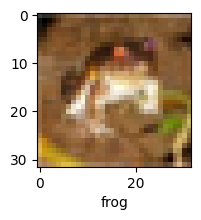

In [10]:
#showing the plots 
plot_sample(X_train, y_train, 0)

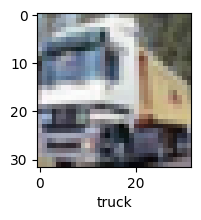

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
#creatitng neural network model

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 122s 77ms/step - loss: 1.8121 - accuracy: 0.3525
Epoch 2/5
 970/1563 [=================>............] - ETA: 48s - loss: 1.6417 - accuracy: 0.4232

In [18]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.43      0.51      1000
           1       0.75      0.40      0.52      1000
           2       0.35      0.45      0.39      1000
           3       0.33      0.43      0.38      1000
           4       0.47      0.35      0.40      1000
           5       0.43      0.29      0.35      1000
           6       0.51      0.56      0.54      1000
           7       0.56      0.56      0.56      1000
           8       0.45      0.77      0.56      1000
           9       0.55      0.52      0.54      1000

    accuracy                           0.48     10000
   macro avg       0.50      0.48      0.47     10000
weighted avg       0.50      0.48      0.47     10000



In [19]:
#defining convolutional neural network 
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [20]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [21]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 23ms/step - loss: 1.4556 - accuracy: 0.4747
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1084 - accuracy: 0.6130
Epoch 3/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9750 - accuracy: 0.6617
Epoch 4/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8904 - accuracy: 0.6894
Epoch 5/10
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8229 - accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7606 - accuracy: 0.7372
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7193 - accuracy: 0.7504
Epoch 8/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6724 - accuracy: 0.7661
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6340 - accuracy: 0.7795
Epoch 10/10
1563/1563 [==============================] - 55s 35m

In [22]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [23]:
y_test[:5]



array([3, 8, 8, 0, 6], dtype=uint8)

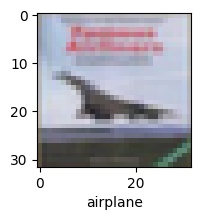

In [24]:
plot_sample(X_test, y_test,3)

In [25]:
#output
classes[y_classes[3]]

'ship'

In [26]:
classes[y_classes[7]]

'deer'

In [ ]:
classes[y_classes[3]]